<a href="https://colab.research.google.com/github/deema1999/IMDB-Movie-Review-using-ML/blob/main/IMDB_Movie_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
# Mounting Google Drive in Colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Processing

In [6]:
# Read data 
df_data = pd.read_csv("/content/gdrive/My Drive/ML/IMDB_Dataset.csv")
df_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
# Explore data
print(df_data['sentiment'].unique())
print("All types : ",list(set(df_data.dtypes.tolist())))

['positive' 'negative']
All types :  [dtype('O')]


SUM : 
 review       0
sentiment    0
dtype: int64


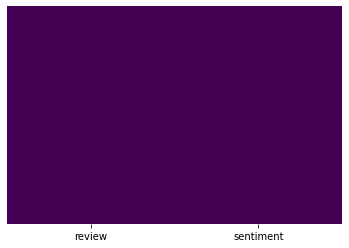

In [8]:
# To check missing values
print("SUM : \n",df_data.isnull().sum())
sns.heatmap(df_data.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [9]:
# Dropping the duplicate rows
duplicate_rows = df_data[df_data.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)

df_data.drop_duplicates(inplace=True)
print("number of duplicate rows : ",df_data[df_data.duplicated()].shape)

number of duplicate rows :  (418, 2)
number of duplicate rows :  (0, 2)


# Mapping of Data Feature Values and Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


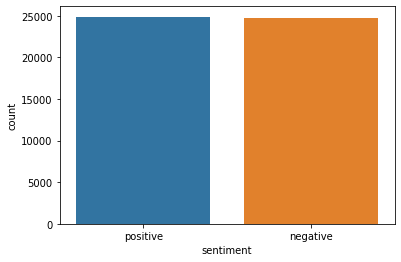

In [10]:
# data visualization
sns.countplot(df_data['sentiment'])

In [11]:
df_data_copy = df_data.copy()
df_data_copy["sentiment"] = df_data_copy["sentiment"].map({"positive":1,"negative":0})
print(df_data_copy.head(30))

                                               review  sentiment
0   One of the other reviewers has mentioned that ...          1
1   A wonderful little production. <br /><br />The...          1
2   I thought this was a wonderful way to spend ti...          1
3   Basically there's a family where a little boy ...          0
4   Petter Mattei's "Love in the Time of Money" is...          1
5   Probably my all-time favorite movie, a story o...          1
6   I sure would like to see a resurrection of a u...          1
7   This show was an amazing, fresh & innovative i...          0
8   Encouraged by the positive comments about this...          0
9   If you like original gut wrenching laughter yo...          1
10  Phil the Alien is one of those quirky films wh...          0
11  I saw this movie when I was about 12 when it c...          0
12  So im not a big fan of Boll's work but then ag...          0
13  The cast played Shakespeare.<br /><br />Shakes...          0
14  This a fantastic movi

# Models Implementation

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

Y = df_data_copy["sentiment"].values
# split the dataset into training data and test data
from sklearn.model_selection import train_test_split
X_train_NB, X_test_NB, Y_train_NB, Y_test_NB = train_test_split(df_data_copy, Y, 
                        test_size= 0.20, random_state=100, stratify=Y)

vec = TfidfVectorizer()
train_vectors = vec.fit_transform(X_train_NB['review'])
test_vectors = vec.transform(X_test_NB['review'])

print("train data : ", train_vectors.shape)
print("test data : ", test_vectors.shape)

train data :  (39665, 93100)
test data :  (9917, 93100)


## Naive Bayes

Classification report : 
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      4940
           1       0.88      0.84      0.86      4977

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.87      0.86      0.86      9917

Confusion matrix: 
 [[4370  570]
 [ 775 4202]]


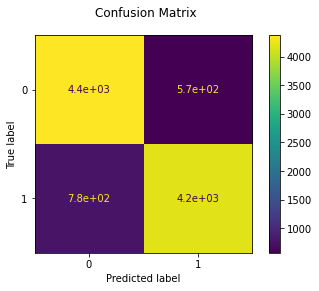

In [12]:
# Classify using Naive Bayes 86%

from sklearn.naive_bayes import MultinomialNB
MNB_clf = MultinomialNB()

# fit model no training data
MNB_clf.fit(train_vectors, Y_train_NB)

# making predictions on the testing set 
predicted = MNB_clf.predict(test_vectors)

# Classification report
from sklearn import metrics
print("Classification report : \n", MNB_clf,"\n", 
      metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(MNB_clf, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

## Logoistic Regression

Classification report : 
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      4940
           1       0.90      0.91      0.91      4977

    accuracy                           0.91      9917
   macro avg       0.91      0.91      0.91      9917
weighted avg       0.91      0.91      0.91      9917

Confusion matrix: 
 [[4425  515]
 [ 424 4553]]


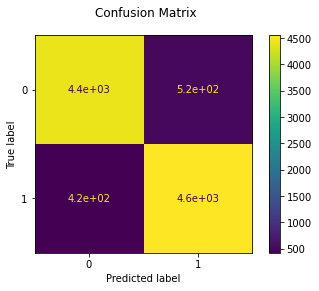

In [42]:
# Classify using Logistic Regression 90%

from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(C= 10, penalty = 'l2', solver  = 'newton-cg')

# fit model no training data
logisticRegr.fit(train_vectors, Y_train_NB)

# making predictions on the testing set 
predicted = logisticRegr.predict(test_vectors)

# Classification report
from sklearn import metrics
print("Classification report : \n", logisticRegr,"\n", 
      metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(logisticRegr, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)


## SVM

In [ ]:
# Classify using SVM
from sklearn.svm import SVC
# all parameters not specified are set to their defaults
svmClassifier = SVC(kernel="linear")
#svm_classifier = SVC()
#svm_classifier = SVC(kernel="poly", degree=5, C=10, gamma=0.01)
#svm_classifier = SVC(kernel="sigmoid", C=10, gamma=0.001)
#svm_classifier = SVC(kernel="rbf", C=300, gamma=0.001)


# fit model no training data
svmClassifier.fit(train_vectors, Y_train_NB)

# making predictions on the testing set 
predicted = svmClassifier.predict(test_vectors)

# Classification report
from sklearn import metrics
print("Classification report : \n", svmClassifier,"\n", 
      metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(svmClassifier, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)


## KNN

Classifier :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')
Classification report for classifier : 
               precision    recall  f1-score   support

           0       0.74      0.84      0.78      4940
           1       0.81      0.70      0.75      4977

    accuracy                           0.77      9917
   macro avg       0.77      0.77      0.77      9917
weighted avg       0.77      0.77      0.77      9917

Confusion matrix: 
 [[4138  802]
 [1482 3495]]


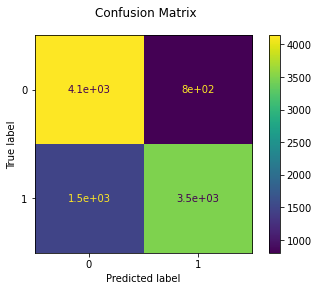

In [14]:
# Classify using KNN 77%

from sklearn.neighbors import KNeighborsClassifier 
# Create the classifier
"""
algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the 
values passed to fit method.
"""
knn_cls = KNeighborsClassifier(n_neighbors = 20) 

# Train the classifier
knn_cls.fit(train_vectors,Y_train_NB)

# Predict the value of X_test
predicted = knn_cls.predict(test_vectors)

# Classification report
from sklearn import metrics

print("Classifier : ", knn_cls)
print("Classification report for classifier : \n",
      metrics.classification_report(Y_test_NB, predicted))

disp = metrics.plot_confusion_matrix(knn_cls, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)


## SGD

Classification report : 
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4940
           1       0.89      0.92      0.90      4977

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917

Confusion matrix: 
 [[4379  561]
 [ 411 4566]]


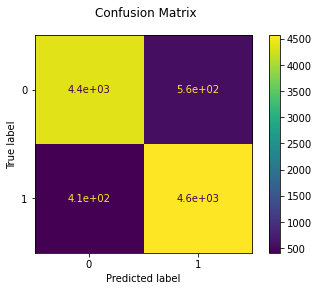

In [33]:
# Classify using SGD 90%

from sklearn.linear_model import SGDClassifier
# all parameters not specified are set to their defaults
sgdClassifier = SGDClassifier()

# fit model no training data
sgdClassifier.fit(train_vectors, Y_train_NB)

# making predictions on the testing set 
predicted = sgdClassifier.predict(test_vectors)

# Classification report
from sklearn import metrics
print("Classification report : \n", sgdClassifier,"\n", 
      metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(sgdClassifier, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)


## XGBoosting

In [ ]:
# Classify using XGBoosting 83%
#import xgboost as xgb
from xgboost import XGBClassifier
XG_clf = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=500, 
                       random_state=100)

# fit model no training data
XG_clf.fit(train_vectors, Y_train_NB)

# make predictions for test data
y_pred = XG_clf.predict(test_vectors)
predicted = [round(value) for value in y_pred]

# Classification report
from sklearn import metrics
print("Classification report : \n", XG_clf,"\n", 
      metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(XG_clf, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)


## MLP Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Classification report : 
 MLPClassifier(activation='logistic', alpha=0.005, batch_size=64, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      4940
           1       0.86      0.91      0.89      4977

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917

Confusion matrix: 
 [[4230  710]
 [ 463 4514]]


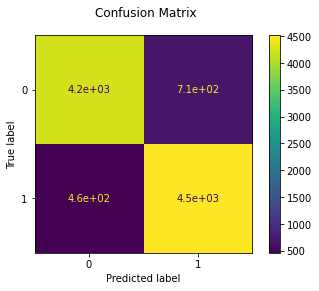

In [16]:
# Classify using MLPClassifier 88% -> (50,50)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,50, ), batch_size=64,
                    solver="adam", alpha=0.005, activation="logistic", 
                    max_iter=50000, random_state=42)


# fit model no training data
mlp.fit(train_vectors, Y_train_NB)

# make predictions for test data
predicted = mlp.predict(test_vectors)

# Classification report
from sklearn import metrics
print("Classification report : \n", mlp,"\n", 
      metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(mlp, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)


# Cross Validation

In [46]:
# Cross-validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Y = df_data_copy["sentiment"].values
vec = TfidfVectorizer()

# split the dataset into training data and test data
from sklearn.model_selection import train_test_split
X_train_NB, X_test_NB, Y_train_NB, Y_test_NB = train_test_split(df_data_copy, Y, 
                        test_size= 0.20, random_state=100, stratify=Y)



train_vectors = vec.fit_transform(X_train_NB['review'])
test_vectors = vec.transform(X_test_NB['review'])

print("\n Stratified K-fold Cross-Validation : *********")
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=10, random_state=100)
model_3 = LogisticRegression()
results_model_3 = cross_val_score(model_3, train_vectors, Y_train_NB, cv=skfold)
print("Scores   3 :",results_model_3)
print("Accuracy 3 :",results_model_3.mean())
print("std      3 :",np.std(results_model_3))


 Stratified K-fold Cross-Validation : *********


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

Scores   3 : [0.89337031 0.8946307  0.89942022 0.89689942 0.89110159 0.89384771
 0.89233485 0.89460414 0.89687342 0.89006556]
Accuracy 3 : 0.8943147901605288
std      3 : 0.0026997568256627424


# Hyperparameters Tuning

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

-----------------------------------------------------------------------
The best parameter after tuning : {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Our model looks after hyper-parameter tuning LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Classification report : 
 GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                        

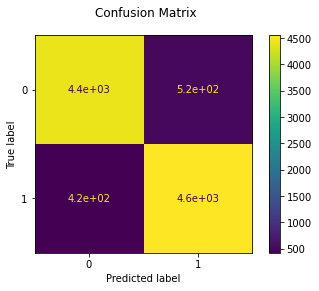

In [45]:
# Hyperparameters Tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

param_grid = [
  # {"C": [1, 10, 100, 1000], "kernel": ["linear"]},
  # {"C": [2, 20, 200, 2000], "gamma": [0.001, 0.0001], "kernel": ["rbf"]},
  # {"hidden_layer_sizes":[(100,50, ) ,(100,100)], "batch_size":[64],"solver":["adam","sgd"], "alpha":[0.005 , 0.0001], "activation":["logistic"], "max_iter":[50000], "random_state":[42]}
   {"solver" : ['newton-cg', 'lbfgs', 'liblinear'], "penalty" : ['l2'], "C" : [100, 10, 1.0, 0.1, 0.01]}  
]


grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 1) 
grid.fit(train_vectors, Y_train_NB)

print("-----------------------------------------------------------------------")
print("The best parameter after tuning :",grid.best_params_)  
print("Our model looks after hyper-parameter tuning",grid.best_estimator_)

predicted = grid.predict(test_vectors)

from sklearn import metrics
print("Classification report : \n", grid,"\n", 
      metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(grid, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)


# Evaluation

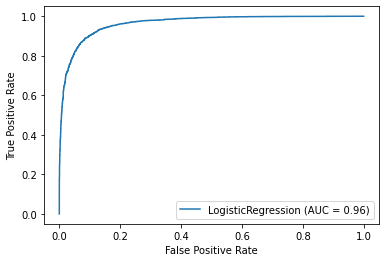

In [37]:
# AUC-ROC curve (an evaluation metric for binary classification problems)
"""
AUC : The Area Under the Curve 
ROC : Receiver Characteristic Operator

AUC measures the entire two-dimensional area underneath the entire ROC curve 
(think integral calculus) from (0,0) to (1,1).

When AUC = 1, then the classifier is able to perfectly distinguish between all 
the Positive and the Negative class points correctly. If, however, the AUC had been 0, 
then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives
"""
from sklearn import metrics
disp = metrics.plot_roc_curve(logisticRegr, test_vectors, Y_test_NB)


Text(0.5, 1.0, '2-class Precision-Recall curve: ')

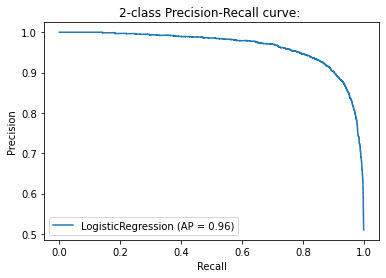

In [38]:
"""
A system with high recall but low precision returns many results, 
but most of its predicted labels are incorrect when compared to the training labels.

A system with high precision but low recall is just the opposite, 
returning very few results, but most of its predicted labels are correct when 
compared to the training labels. 

An ideal system with high precision and high recall will return many results, 
with all results labeled correctly.

AP : average precision AP = SUMn((Rn - Rn-1) * Pn) 
"""
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(logisticRegr, test_vectors, Y_test_NB)
disp.ax_.set_title("2-class Precision-Recall curve: ")


# Gradio (UI)

In [22]:
pip install gradio

     |████████████████████████████████| 2.1MB 12.2MB/s 
     |████████████████████████████████| 215kB 50.9MB/s 
     |████████████████████████████████| 1.9MB 40.5MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 3.2MB 46.7MB/s 
     |████████████████████████████████| 962kB 41.9MB/s 
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=98ba21571e03cf4f56d18c253ea62e657799ad425f75cef6dc13ea0b90864b8a
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=40b9fb6e20c850e6c6abb93359a3fa05777ae5e75afee91f6718f6a7428e48ec
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
Successfully built flask-cachebuster ffmpy


In [36]:
# https://www.gradio.app/ml_examples
# https://www.kaggle.com/scolianni/mnistasjpg

import tensorflow as tf
from tensorflow import keras
import numpy as np
import gradio as gr
import requests

def inference(review):
    labels = ['negative' , 'positive']
    texts = vec.transform([review])
    pred = logisticRegr.predict_proba(texts)
    dictionary = dict(zip(labels, map(float, pred[0])))
    return dictionary


gr.Interface(fn=inference, 
             inputs="textbox", 
             outputs=gr.outputs.Label(num_top_classes=2)).launch(share=True) #, debug=True Use in Colab




Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://49676.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7867/',
 'https://49676.gradio.app')